# Pyber Challenge

### 4.3 Loading and Reading CSV files

In [251]:
# Add Matplotlib inline magic command
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import os

# File to Load
city_data_to_load = "Resources/city_data.csv"
ride_data_to_load = "Resources/ride_data.csv"

# Read the City and Ride Data
city_data_df = pd.read_csv(city_data_to_load)
ride_data_df = pd.read_csv(ride_data_to_load)

city_data_df 


,city,driver_count,type
0,Richardfort,38,Urban
1,Williamsstad,59,Urban
2,Port Angela,67,Urban
3,Rodneyfort,34,Urban
4,West Robert,39,Urban
...,...,...,...
115,Bradshawfurt,7,Rural
116,New Ryantown,2,Rural
117,Randallchester,9,Rural
118,Jessicaport,1,Rural


### Merge the DataFrames

In [252]:
# Combine the data into a single dataset, merging on the 'city' column. 
pyber_data_df = pd.merge(ride_data_df, city_data_df, how="left", on=["city", "city"])

# Display the data table for preview
pyber_data_df.head(15)

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban
5,South Latoya,2019-03-11 12:26:48,9.52,1994999424437,10,Urban
6,New Paulville,2019-02-27 11:17:56,43.25,793208410091,44,Urban
7,Simpsonburgh,2019-04-26 00:43:24,35.98,111953927754,21,Urban
8,South Karenland,2019-01-08 03:28:48,35.09,7995623208694,4,Urban
9,North Jasmine,2019-03-09 06:26:29,42.81,5327642267789,33,Urban


In [253]:
#record count for analysis 
pyber_data_df.count()

city            2375
date            2375
fare            2375
ride_id         2375
driver_count    2375
type            2375
dtype: int64

## Deliverable 1: Get a Summary DataFrame 

In [254]:
#  1. Get the total rides for each city type, set the city type as the index and count the number of rides
citygroup = pyber_data_df.groupby(by="type", as_index=True).count()["ride_id"]

# check for grouping and count success
citygroup

#total number of rides for each city type (5)

type
Rural        125
Suburban     625
Urban       1625
Name: ride_id, dtype: int64

In [255]:
# 2. Get the total drivers for each city type
drivercount = city_data_df.groupby(by="type", as_index=True).sum()["driver_count"]

#check for sum success
drivercount

#total number of drivers for each city type (5)

type
Rural         78
Suburban     490
Urban       2405
Name: driver_count, dtype: int64

In [256]:
#  3. Get the total amount of fares for each city type
faretotal = pyber_data_df.groupby(by="type", as_index=True).sum()["fare"]

#check for sum success
faretotal

#sum of fares for each city type (5)

type
Rural        4327.93
Suburban    19356.33
Urban       39854.38
Name: fare, dtype: float64

In [257]:
# 4. Get the average fare per ride for each city type 
cityavg = pyber_data_df.groupby(by="type", as_index=True).mean()["fare"]

#check for mean success
cityavg

#average fare per ride for each city type (5)

type
Rural       34.623440
Suburban    30.970128
Urban       24.525772
Name: fare, dtype: float64

In [258]:
# 5. Get the average fare per driver for each city type. 
driversum_by_type =(pyber_data_df.groupby(by = "type", as_index= True).sum("fare"))

#check for sum success
driversum_by_type

,fare,ride_id,driver_count
type,,,
Rural,4327.93,580968240341287,537
Suburban,19356.33,3106884522576766,8570
Urban,39854.38,7919412664056093,59602


In [259]:
#calculate the average fares by driver 
avg_fares_by_driver = faretotal / drivercount

#check for average success
avg_fares_by_driver

#average fare per driver for each city type (5)

type
Rural       55.486282
Suburban    39.502714
Urban       16.571468
dtype: float64

In [260]:
#  6. Create a PyBer summary DataFrame. 
#  Suggested code structure: https://sparkbyexamples.com/pandas/pandas-create-dataframe-from-multiple-series/

summary_city = pd.concat({"Total Rides":citygroup,
                          "Total Drivers":drivercount, 
                          "Total Fares": faretotal, 
                          "Average Fare Per Ride": cityavg, 
                          "Average Fare Per Driver": avg_fares_by_driver}, axis=1)

#check summary city format
summary_city

#create a summary dataframe (5) 

,Total Rides,Total Drivers,Total Fares,Average Fare Per Ride,Average Fare Per Driver
type,,,,,
Rural,125,78,4327.93,34.623440,55.486282
Suburban,625,490,19356.33,30.970128,39.502714
Urban,1625,2405,39854.38,24.525772,16.571468


In [261]:
#  7. Cleaning up the DataFrame. Delete the index name
summary_city.index.name = None

#check summary city format (type index removed)
summary_city

,Total Rides,Total Drivers,Total Fares,Average Fare Per Ride,Average Fare Per Driver
Rural,125,78,4327.93,34.623440,55.486282
Suburban,625,490,19356.33,30.970128,39.502714
Urban,1625,2405,39854.38,24.525772,16.571468


In [262]:
#  8. Format the columns.
# shared from Elong as part of class slack discussion 

format_mapping = {"Total Rides": "{:,}",
                  "Total Drivers": "{:,}",
                  "Total Fares": "${:,.2f}",
                  "Average Fare Per Ride": "${:,.2f}",
                  "Average Fare Per Driver":"${:,.2f}"}
summary_format = summary_city.style.format(format_mapping)

#check summary post formatting
summary_format

#format summary DataFrame (5)

,Total Rides,Total Drivers,Total Fares,Average Fare Per Ride,Average Fare Per Driver
Rural,125,78,"$4,327.93",$34.62,$55.49
Suburban,625,490,"$19,356.33",$30.97,$39.50
Urban,"1,625","2,405","$39,854.38",$24.53,$16.57


## Deliverable 2.  Create a multiple line plot that shows the total weekly of the fares for each type of city.

In [263]:
# 1. Read the original merged DataFrame
pyber_data_df.head(15)

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban
5,South Latoya,2019-03-11 12:26:48,9.52,1994999424437,10,Urban
6,New Paulville,2019-02-27 11:17:56,43.25,793208410091,44,Urban
7,Simpsonburgh,2019-04-26 00:43:24,35.98,111953927754,21,Urban
8,South Karenland,2019-01-08 03:28:48,35.09,7995623208694,4,Urban
9,North Jasmine,2019-03-09 06:26:29,42.81,5327642267789,33,Urban


In [264]:
# 2. Using groupby() to create a new DataFrame showing the sum of the fares 
#  for each date where the indices are the city type and date.
city_date_group = pyber_data_df.groupby(["type", "date"]).sum("fare")

#check city_date group
city_date_group.head(10)

#groupby() to group by type and date columns, and Sum for fare (10) 

fare        ride_id  driver_count
type  date                                                   
Rural 2019-01-01 09:45:36  43.69  2424875833354             1
      2019-01-02 11:18:32  52.12  3454018971635             1
      2019-01-03 19:51:01  19.90  5559509612597             8
      2019-01-04 03:31:26  24.88  4195619112933             8
      2019-01-06 07:38:40  47.33  3849747342021             4
      2019-01-08 06:19:45  19.39  5350347217506             1
      2019-01-09 15:30:35  31.84  3730685356921             4
      2019-01-11 04:39:27  16.42  8800556719157             6
      2019-01-14 07:09:17  18.05  5405362355006             1
      2019-01-14 15:58:48  54.10   432925983890             6

In [265]:
# 3. Reset the index on the DataFrame you created in #1. This is needed to use the 'pivot()' function.
# df = df.reset_index()

city_date = city_date_group.reset_index()

#check city_date layout 
city_date


,type,date,fare,ride_id,driver_count
0,Rural,2019-01-01 09:45:36,43.69,2424875833354,1
1,Rural,2019-01-02 11:18:32,52.12,3454018971635,1
2,Rural,2019-01-03 19:51:01,19.90,5559509612597,8
3,Rural,2019-01-04 03:31:26,24.88,4195619112933,8
4,Rural,2019-01-06 07:38:40,47.33,3849747342021,4
...,...,...,...,...,...
2370,Urban,2019-05-08 04:20:00,21.99,117997692054,52
2371,Urban,2019-05-08 04:39:49,18.45,1811574736337,11
2372,Urban,2019-05-08 07:29:01,18.55,5682021476085,33
2373,Urban,2019-05-08 11:38:35,19.77,7837163332630,4


In [266]:
# 4. Create a pivot table with the 'date' as the index, the columns ='type', and values='fare' 
# to get the total fares for each type of city by the date. 

#create pivot table
city_type_pivot = city_date.pivot(index = "date", columns ="type", values="fare")

#check pivot table
city_type_pivot.head(15)

#pivot() used to create a function where index is the date, columns are type, values are fare (5)

type,Rural,Suburban,Urban
date,,,
2019-01-01 00:08:16,NaN,NaN,37.91
2019-01-01 00:46:46,NaN,47.74,NaN
2019-01-01 02:07:24,NaN,24.07,NaN
2019-01-01 03:46:50,NaN,NaN,7.57
2019-01-01 05:23:21,NaN,NaN,10.75
2019-01-01 09:45:36,43.69,NaN,NaN
2019-01-01 12:32:48,NaN,25.56,NaN
2019-01-01 14:40:14,NaN,NaN,5.42
2019-01-01 14:42:25,NaN,NaN,12.31


In [267]:
# 5. Create a new DataFrame from the pivot table DataFrame using loc on the given dates, '2019-01-01':'2019-04-29'.

#create date defined dataframe 
date_range = city_type_pivot.loc['2019-01-01':'2019-04-29']

#check dataframe 
date_range.head(15)

#dataframe created using .loc on specific date range (5)

type,Rural,Suburban,Urban
date,,,
2019-01-01 00:08:16,NaN,NaN,37.91
2019-01-01 00:46:46,NaN,47.74,NaN
2019-01-01 02:07:24,NaN,24.07,NaN
2019-01-01 03:46:50,NaN,NaN,7.57
2019-01-01 05:23:21,NaN,NaN,10.75
2019-01-01 09:45:36,43.69,NaN,NaN
2019-01-01 12:32:48,NaN,25.56,NaN
2019-01-01 14:40:14,NaN,NaN,5.42
2019-01-01 14:42:25,NaN,NaN,12.31


In [268]:
# 6. Set the "date" index to datetime datatype. This is necessary to use the resample() method in Step 8.
# df.index = pd.to_datetime(df.index)

#reset index to prep for date/time conversion 
date_range_dt = date_range.reset_index()


#check data types (pre conversion)
date_range_dt.dtypes




type
date         object
Rural       float64
Suburban    float64
Urban       float64
dtype: object

In [269]:
#  Change the 'date' column to a datetime object.
date_range_dt["date"]= pd.to_datetime(date_range_dt["date"])



In [270]:
# 7. Check that the datatype for the index is datetime using df.info()

#check data types (post conversion)
date_range_dt.dtypes

type
date        datetime64[ns]
Rural              float64
Suburban           float64
Urban              float64
dtype: object

In [271]:
# 8. Create a new DataFrame using the "resample()" function by week 'W' and get the sum of the fares for each week.

#set data frame index to date. 
date_range_dt.set_index("date", inplace=True)

#check data frame structure
date_range_dt

type,Rural,Suburban,Urban
date,,,
2019-01-01 00:08:16,NaN,NaN,37.91
2019-01-01 00:46:46,NaN,47.74,NaN
2019-01-01 02:07:24,NaN,24.07,NaN
2019-01-01 03:46:50,NaN,NaN,7.57
2019-01-01 05:23:21,NaN,NaN,10.75
...,...,...,...
2019-04-28 14:28:36,NaN,NaN,11.46
2019-04-28 16:29:16,NaN,NaN,36.42
2019-04-28 17:26:52,NaN,NaN,31.43


In [272]:
#resample date range by week 
weekly_rides_df = date_range_dt.resample('W').sum()

#check dataframe 
weekly_rides_df.head(10)

#dataframe crated using resample() and shows sum for each week. (10)

type,Rural,Suburban,Urban
date,,,
2019-01-06,187.92,721.60,1661.68
2019-01-13,67.65,1105.13,2050.43
2019-01-20,306.00,1218.20,1939.02
2019-01-27,179.69,1203.28,2129.51
2019-02-03,333.08,1042.79,2086.94
2019-02-10,115.80,974.34,2162.64
2019-02-17,95.82,1045.50,2235.07
2019-02-24,419.06,1412.74,2466.29
2019-03-03,175.14,858.46,2218.20


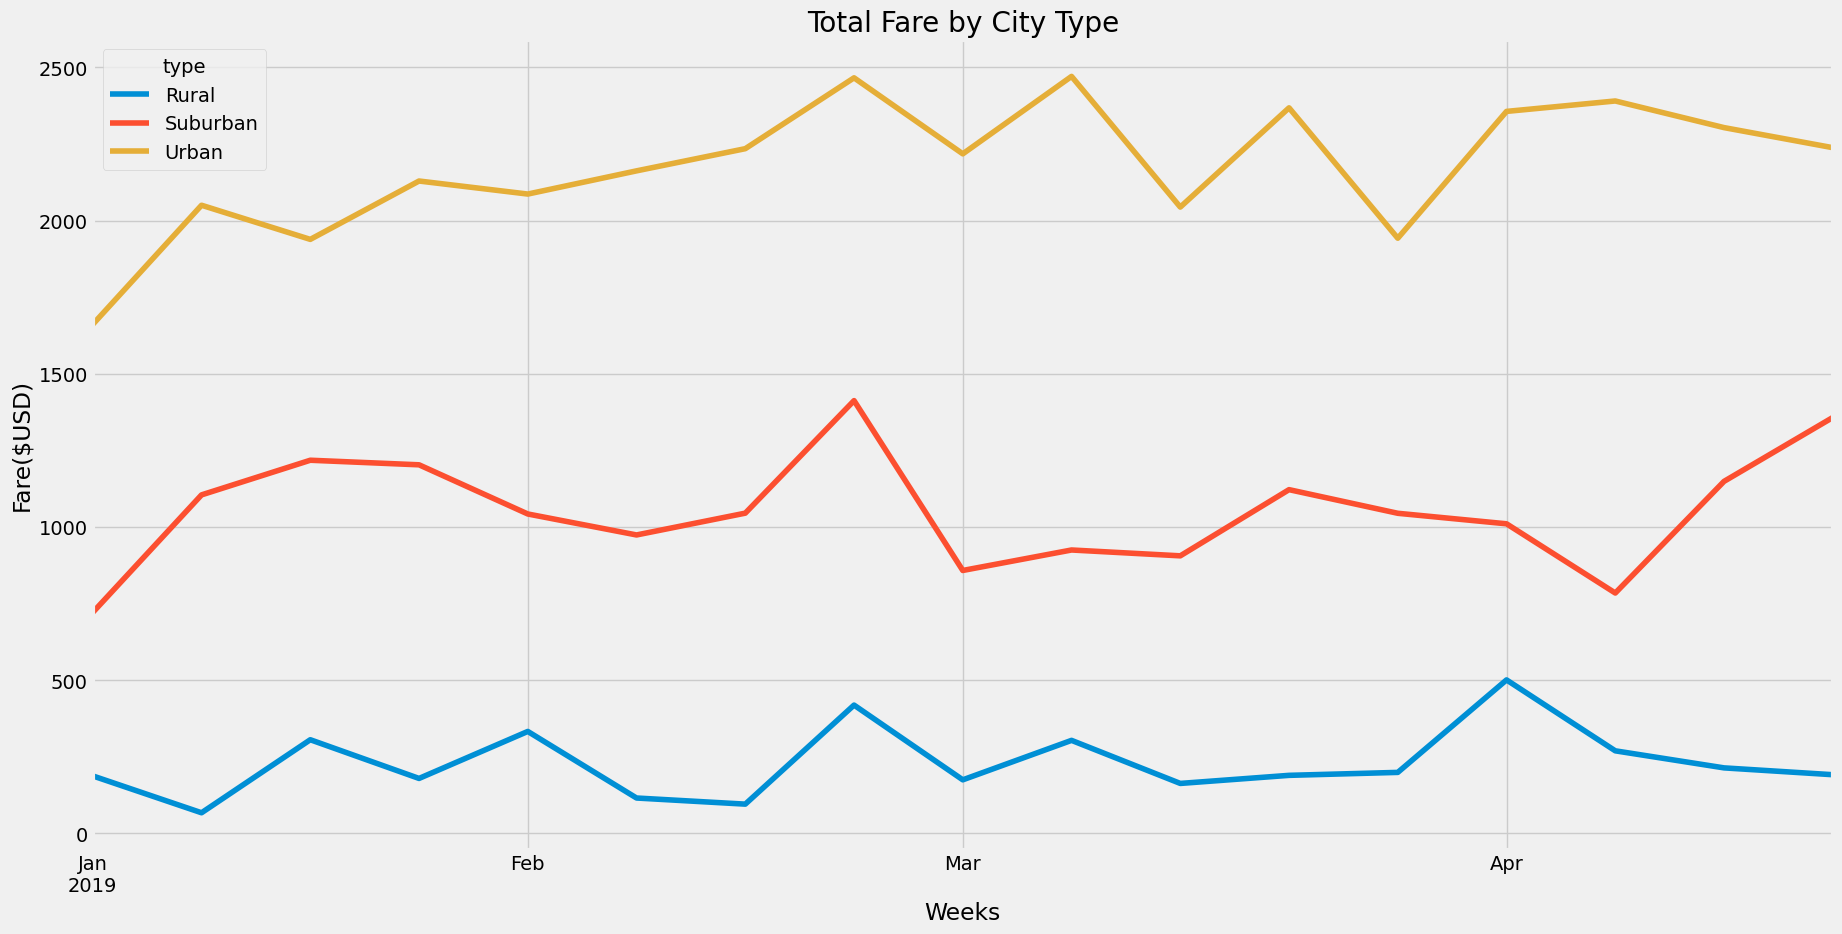

<Figure size 640x480 with 0 Axes>

In [283]:
# 8. Using the object-oriented interface method, plot the resample DataFrame using the df.plot() function. 

# Import the style from Matplotlib.
from matplotlib import style
# Use the graph style fivethirtyeight.
style.use('fivethirtyeight')

# Plot the resampled DataFrame.
weekly_rides = weekly_rides_df.plot(figsize = (20,10))
# Add a title 
weekly_rides.set_title("Total Fare by City Type")
#  Add a x- and y-axis label.
weekly_rides.set_xlabel("Weeks")
weekly_rides.set_ylabel("Fare($USD)")

#save plot
plt.savefig("analysis/Fig1.png")

#show and format plot
plt.show()
plt.tight_layout()

#annotated chart showing total fares by city type is created and saved to analysis folder (10)

